In [2]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [14, 5]})

In [5]:
import numpy as np
import yfinance as yf
import datetime as dt
import math
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import seaborn as sns
from scipy.stats import norm

In [6]:
#We download NVDA price data into DataFrame
ticker=['NVDA']
start = dt.datetime(2021,10,6)
end = dt.datetime.now()
df=yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-06,201.199997,207.199997,200.800003,207.000000,206.707748,29720200
2021-10-07,210.919998,213.220001,209.720001,210.750000,210.452469,25691900
2021-10-08,211.009995,212.059998,207.750000,208.309998,208.015884,15125800
2021-10-11,205.750000,210.630005,205.110001,206.949997,206.657852,16338800
2021-10-12,208.279999,210.570007,205.279999,206.710007,206.418167,16213400
...,...,...,...,...,...,...
2023-10-03,448.079987,451.299988,432.459991,435.170013,435.170013,47085000
2023-10-04,437.420013,441.429993,432.920013,440.410004,440.410004,36182100
2023-10-05,440.500000,449.000000,438.880005,446.880005,446.880005,39348300


In [8]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

<Axes: xlabel='Date'>

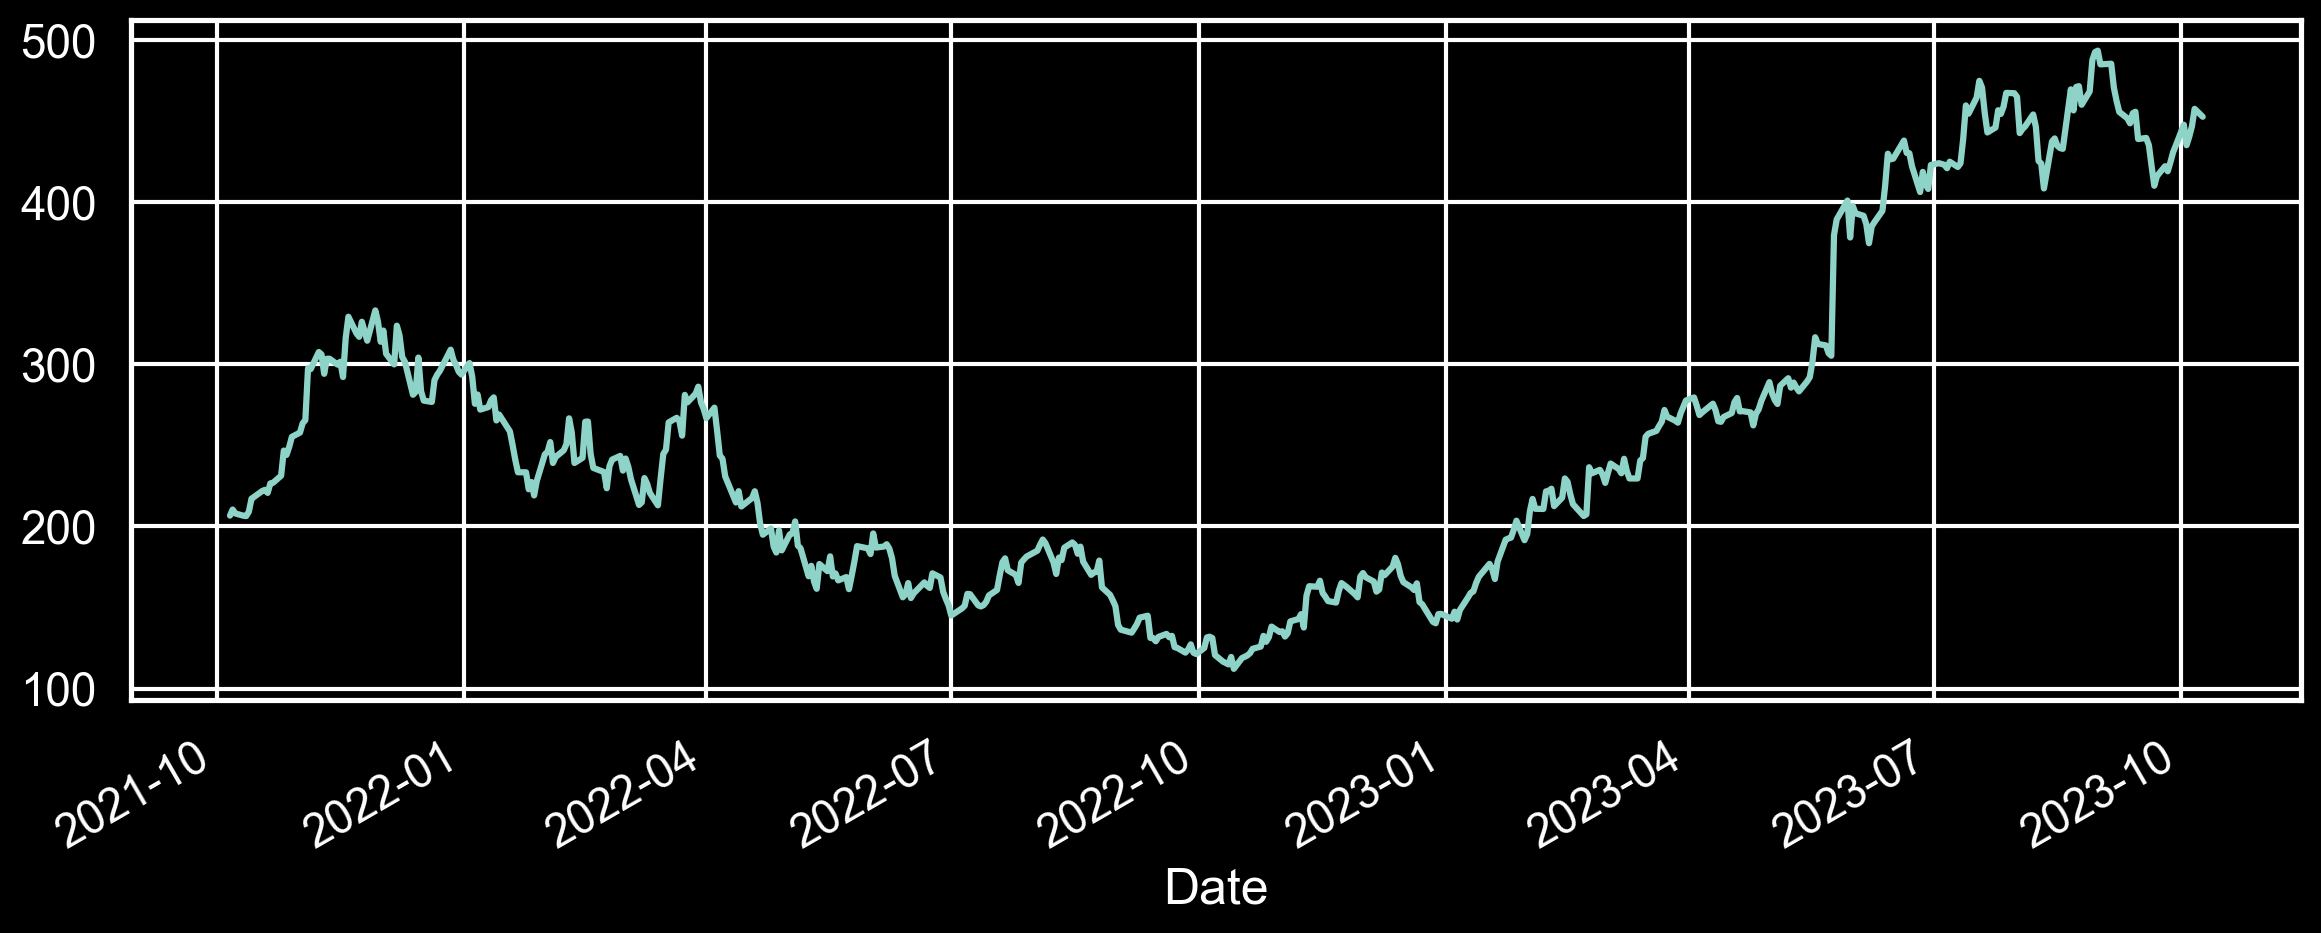

In [9]:
df['Adj Close'].plot()

In [10]:
df['Adj Close'].iplot()

In [11]:
#calculate the compound annual growth rate (CAGR) which will give us our mean return input (mu). 
days = (df.index[-1] - df.index[0]).days
cagr = ((((df['Adj Close'][-1]) / df['Adj Close'][1])) ** (252/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

CAGR = 30.130000000000003%


In [12]:
#create a series of percentage returns and calculate annual volatility of returns.
df['Returns'] = df['Adj Close'].pct_change()
vol = df['Returns'].std()*math.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

Annual Volatility = 58.67%


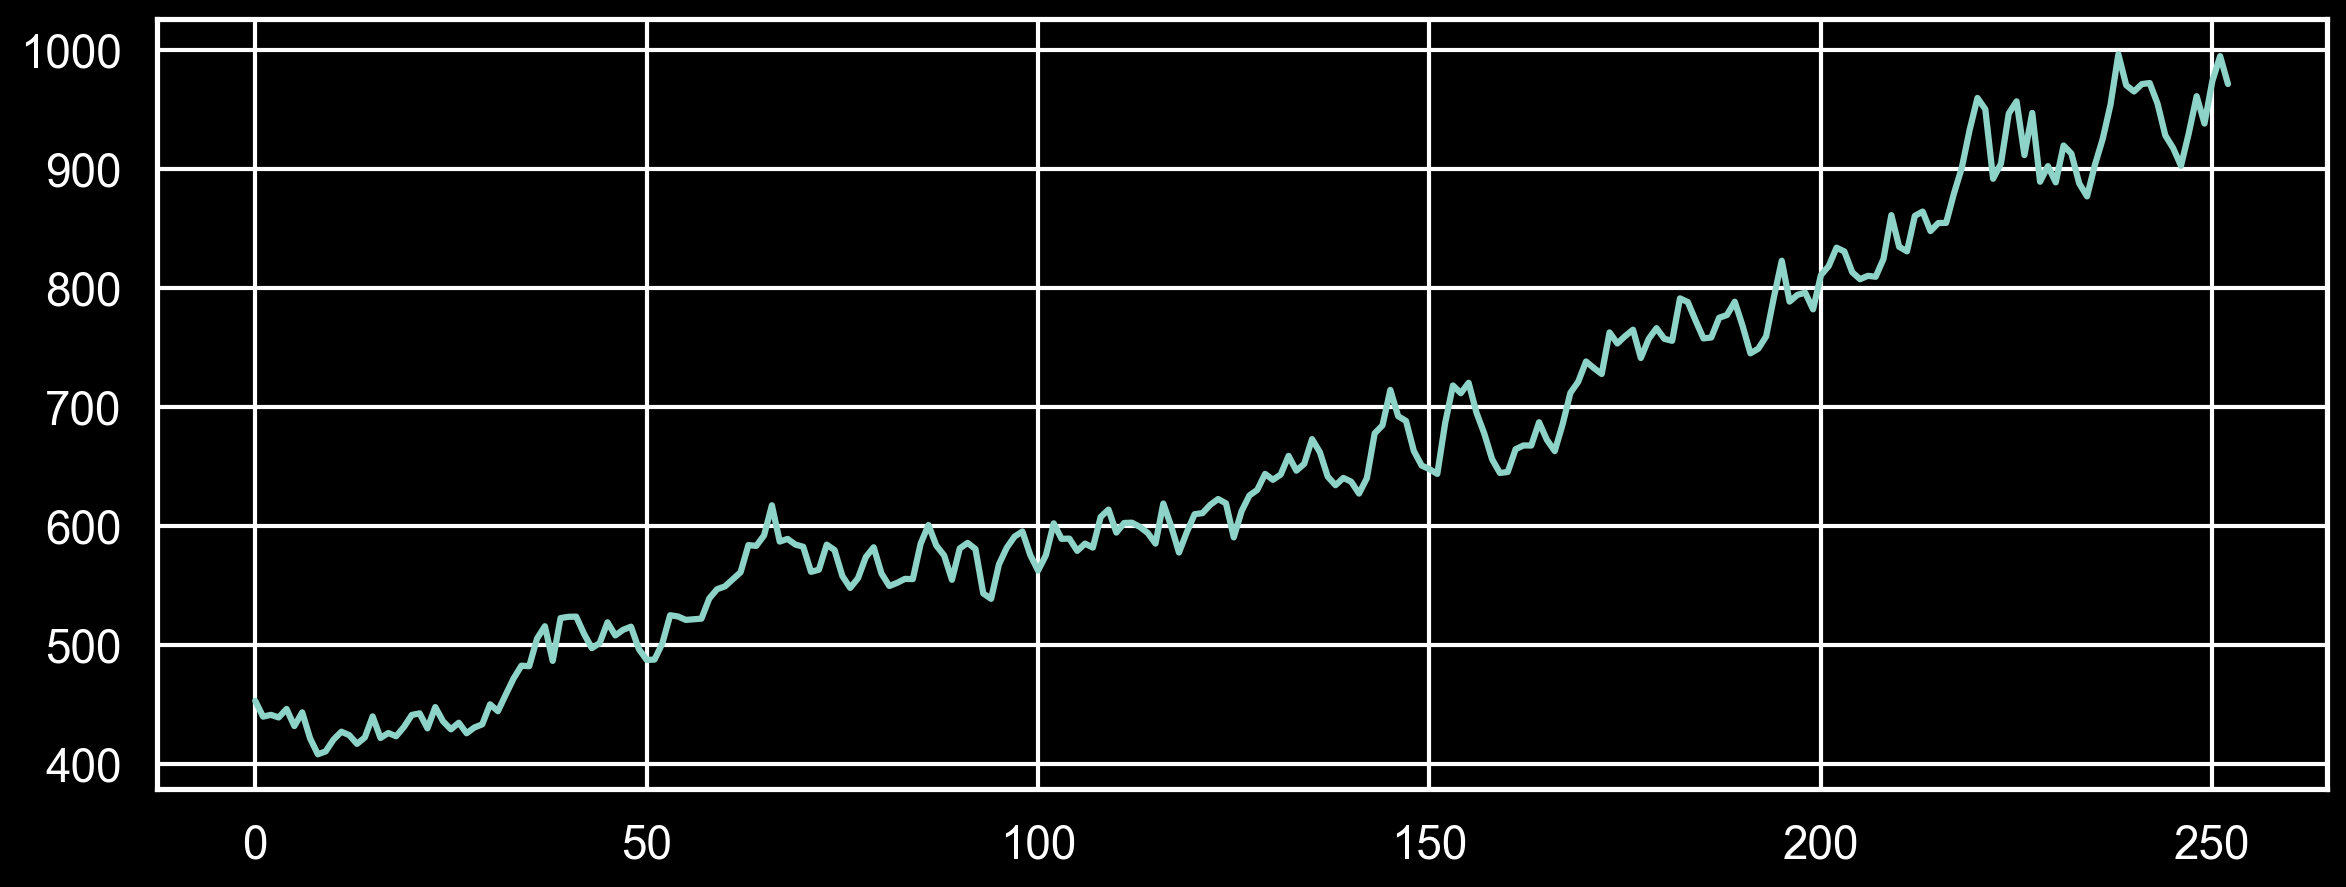

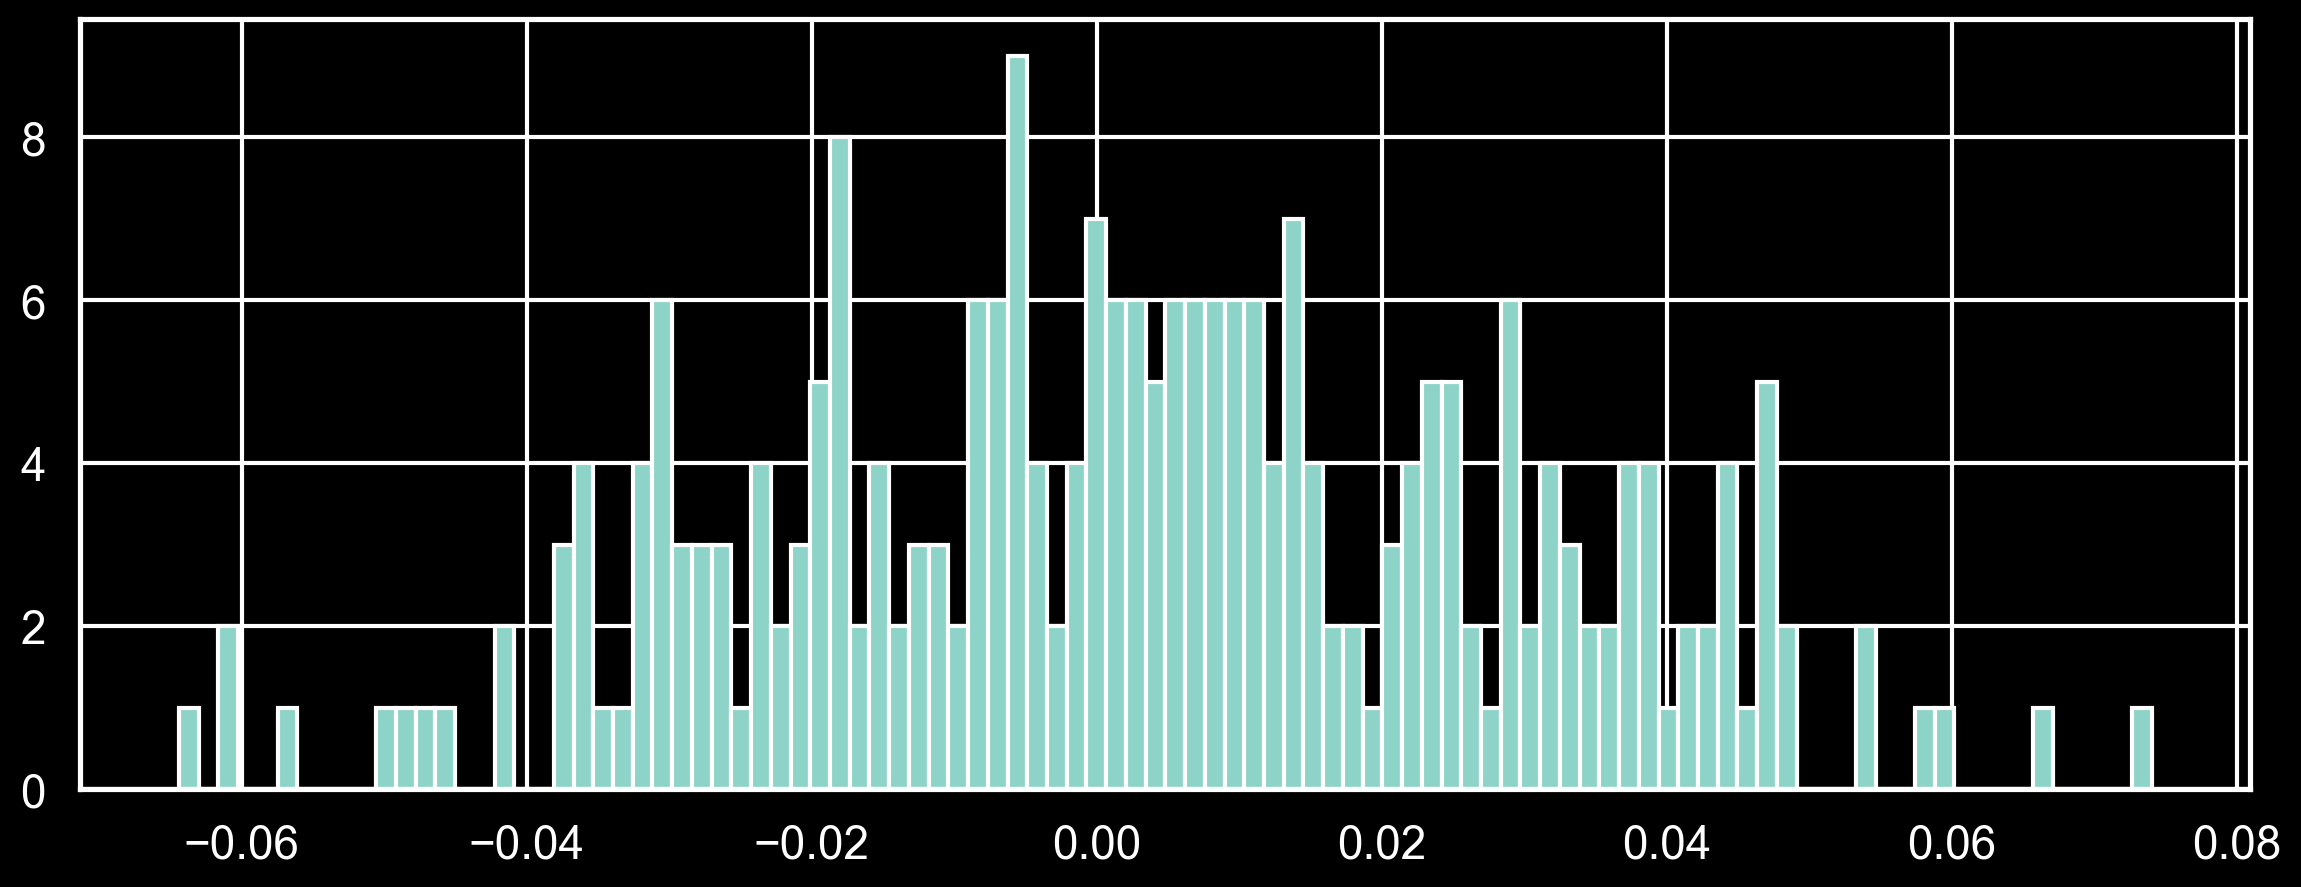

In [13]:
#Define Variables
S = df['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
#set starting price and create price series generated by above random daily returns
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1]*x)
#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

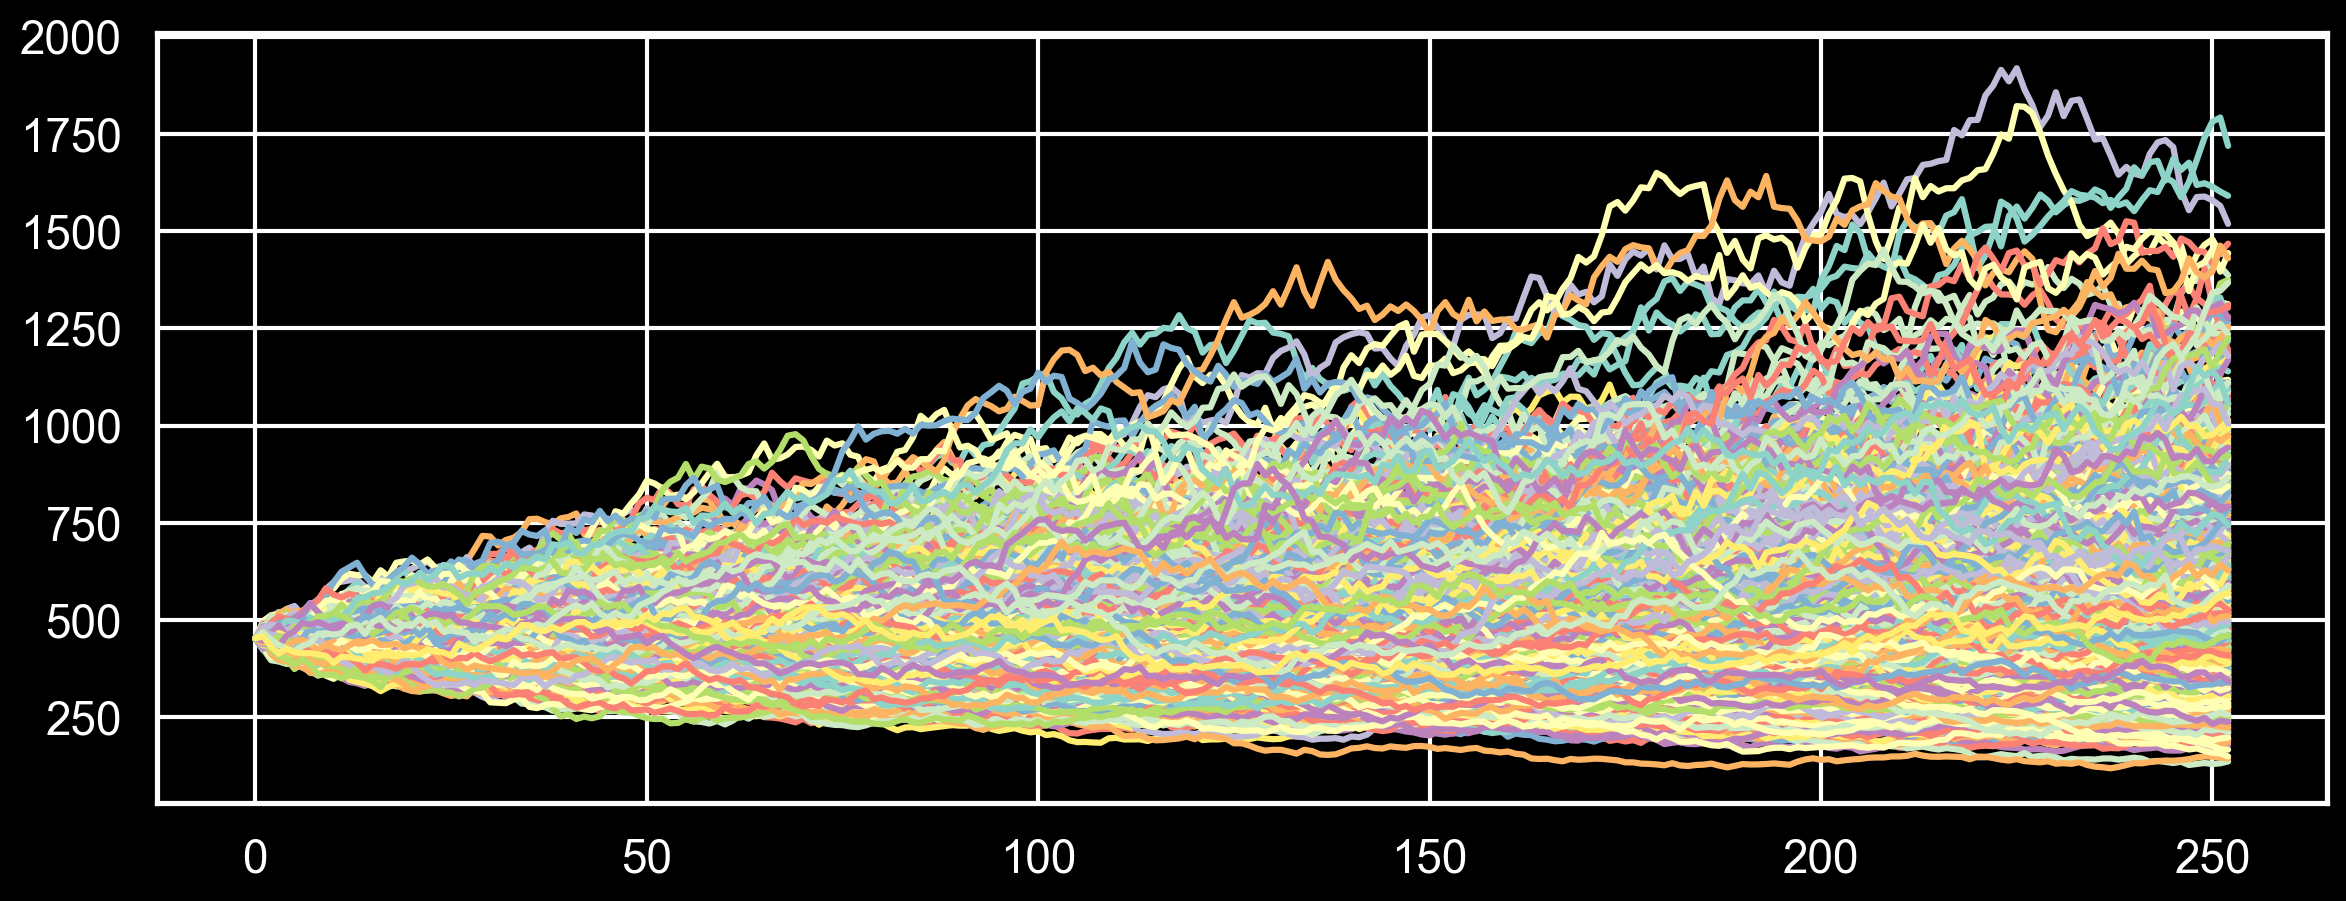

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
#Define Variables
S = df['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
#show the plot of multiple price series created above
plt.show()

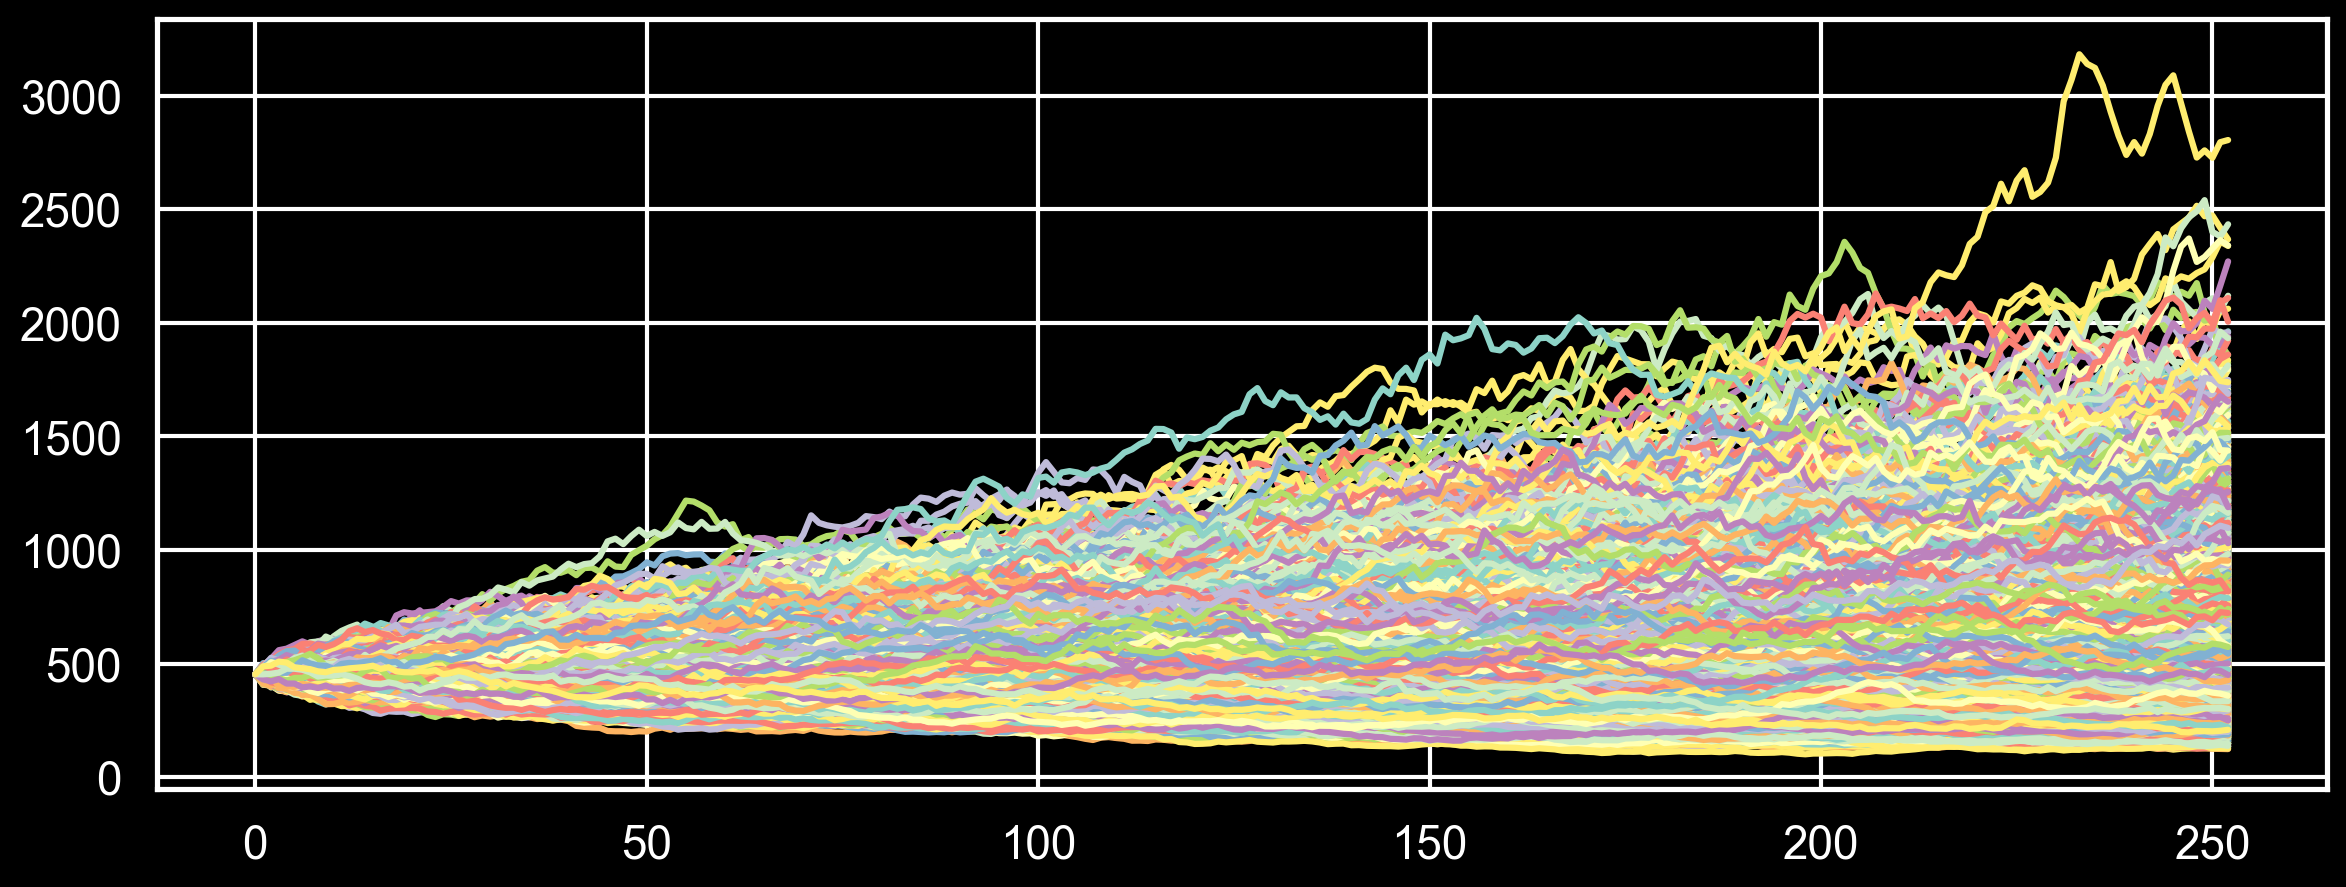

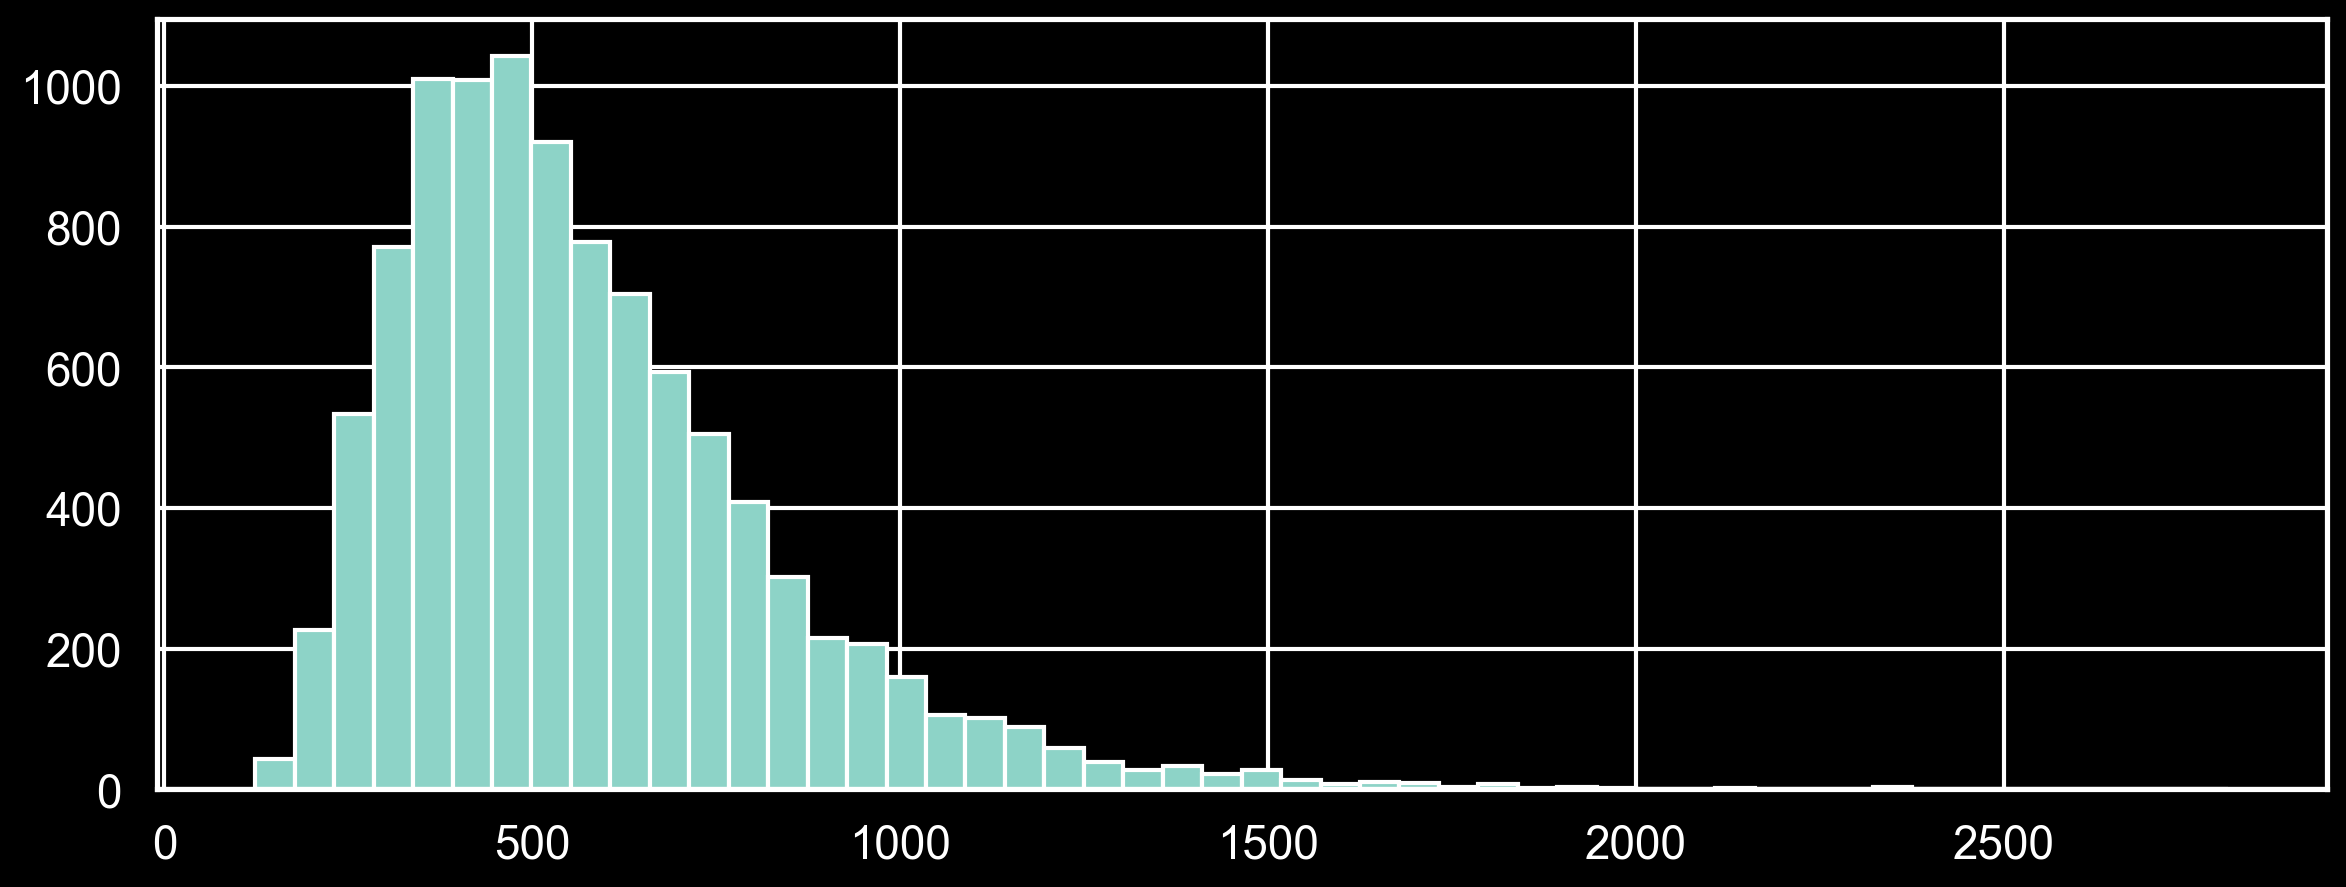

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
#set up empty list to hold our ending values for each simulated price series
result = []
#Define Variables
S = df['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
#choose number of runs to simulate - I have chosen 10,000
for i in range(10000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
#show the plot of multiple price series created above
plt.show()
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [16]:
#use numpy mean function to calculate the mean of the result
print(round(np.mean(result),2))

572.64


In [17]:
print("5% quantile =",np.percentile(result,5))
print("95% quantile =",np.percentile(result,95))

5% quantile = 256.594264550306
95% quantile = 1065.478980018056


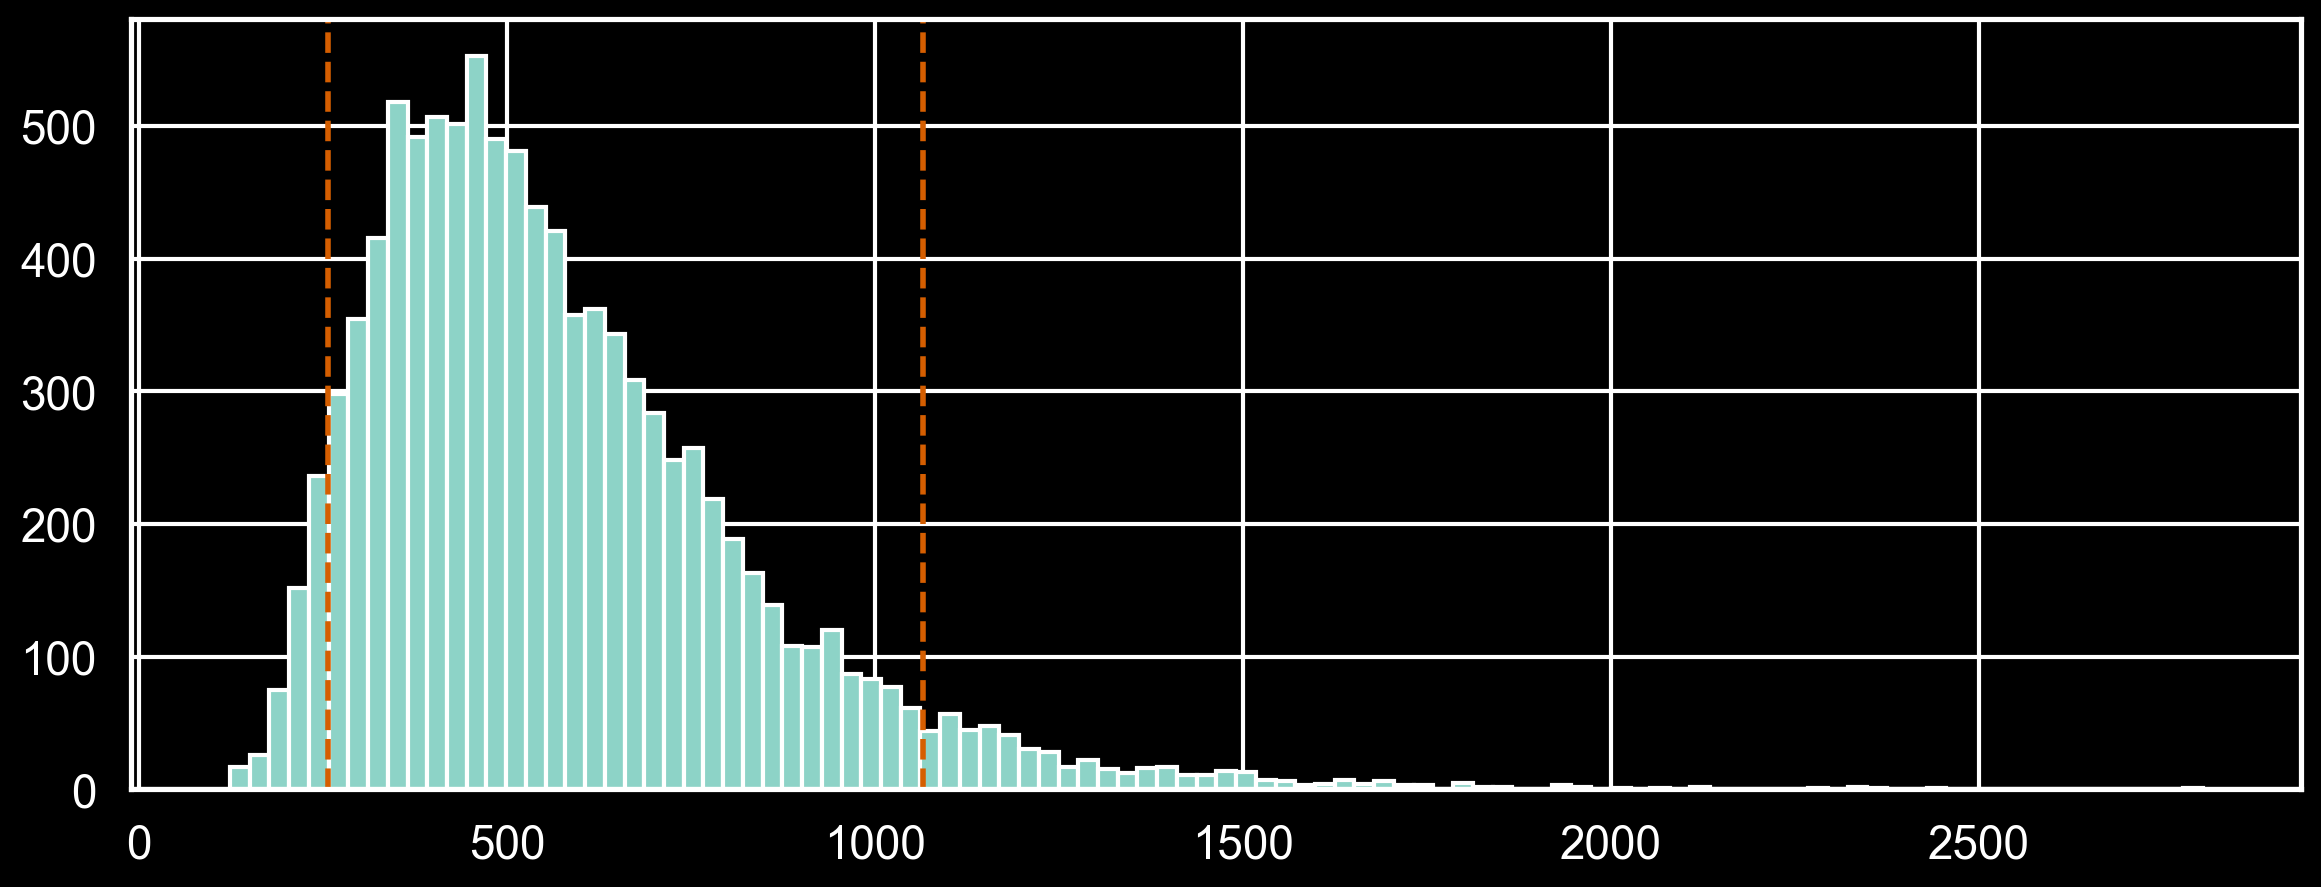

In [19]:
plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

So now we can begin to ask ourselves questions along the lines of “am I willing to risk a 5% chance of ending up with a stock worth less than $256.59, in order to chase an expected return of around 30.13%, giving us an expected stock price of around $572.64?”